## BUSINESS UNDERSTANDING


### BUSINESS OBJECTIVES

#### PROBLEM STATEMENT

#### BUSINESS QUESTIONS

#### EXPECTED BENEFITS

### BUSINESS SUCCESS CRITERIA

## DATA UNDERSTANDING

### SOURCE AND BRIEF DESCRIPTION
The source of the data sets used in this analysis are from http://taarifa.org/ and http://maji.go.tz/. They contain attributes pertaining to water points supplying clean and potable water across Tanzania. The data was split into three - training set values, test set values and training set labels - for the purpose of an online competition. For the scope of this analysis, the training set and its labels will be merged into a single dataset, allowing for greater control over the direction of the investigation. The test data will be used later to test model performance. 

### CONDITION OF THE DATA
Loading the data before checking its condition:

In [96]:
# Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [97]:
# Reading the datasets
label_df = pd.read_csv('0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
test_df = pd.read_csv('702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')
train_df = pd.read_csv('4910797b-ee55-40a7-8668-10efd5c1b960.csv')

In [98]:
label_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [99]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.3+ KB


In [100]:
label_df.describe()

,id
count,59400.000000
mean,37115.131768
std,21453.128371
min,0.000000
25%,18519.750000
50%,37061.500000
75%,55656.500000
max,74247.000000


In [101]:
label_df.shape

(59400, 2)

In [102]:
test_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [103]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [104]:
test_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [105]:
test_df.shape

(14850, 40)

In [106]:
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [107]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [108]:
train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [109]:
train_df.shape

(59400, 40)

In [110]:
train_df.columns


Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

From the above, there is uniformity in the three data sets in that all have 40 columns. The columns in train_df are similar to those in test_df. Promising features that could contribute to answering our business questions include 'construction_year','extraction_type','management','water_quality' and 'quantity'. From the shapes, the initial dataset was split using the ratio 80%:20%

## DATA PREPARATION

### FEATURE ENGINEERING

### CLEANING

In [111]:
# Cleaning the train dataset
# Checking for missing values
train_df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [112]:
# Inspecting 'funder' column
train_df['funder'].value_counts().head(10)

funder
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Name: count, dtype: int64

In [113]:
# Inspecting 'installer' column
train_df['installer'].value_counts().head(10)

installer
DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
Name: count, dtype: int64

In [114]:
# Since we cannot predict unknown values for 'funder' and 'installer' column, we will fill them with 'Unknown'
train_df['funder'].fillna('Unknown', inplace=True)
train_df['installer'].fillna('Unknown', inplace=True)
train_df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [115]:
# Inspecting 'wpt_name' column
train_df['wpt_name'].value_counts()

wpt_name
none                       3563
Shuleni                    1748
Zahanati                    830
Msikitini                   535
Kanisani                    323
                           ... 
Kwa Medadi                    1
Kwa Kubembeni                 1
Shule Ya Msingi Milanzi       1
Funua                         1
Kwa Mzee Lugawa               1
Name: count, Length: 37399, dtype: int64

In [116]:
# There is a 'none' value in the 'wpt_name' column has the most values meaning that many water points do not have names. Thus it is safe to assign the missing
# values for 'wpt_name' to this value
train_df['wpt_name'].fillna('none', inplace=True)

In [117]:
# We can replace this none value with a more comprehensive value 'Nameless'
train_df['wpt_name'].replace('none', 'Nameless', inplace=True)

In [118]:
# Inspecting 'subvillage' column
train_df['subvillage'].value_counts(10)

subvillage
Madukani        0.008606
Shuleni         0.008572
Majengo         0.008504
Kati            0.006319
Mtakuja         0.004438
                  ...   
Kipompo         0.000017
Chanyamilima    0.000017
Ikalime         0.000017
Kemagaka        0.000017
Kikatanyemba    0.000017
Name: proportion, Length: 19287, dtype: float64

In [119]:
# From the above, there is no subvillage that stands out as an outlier. Therefore, we cannot make any meaningful assumptions. This means that we have to drop the missing values. 
# There is also a subvillage that has a value of 'M', which appears to be an anomaly. However, the frequency of its occurrence 
# suggests that it may actually represent a legitimate subvillage, thus we will not remove it.
train_df = train_df.dropna(subset=['subvillage'])

In [120]:
# Inspecting 'public_meeting' column
train_df['public_meeting'].value_counts()

public_meeting
True     50642
False     5054
Name: count, dtype: int64

In [121]:
# Since 'public_meeting' is a boolean column heavily dominated by True, we can replace the missing values randomly based on the ratio of True to False
# Calculating the ratio of True and False
true_ratio = train_df['public_meeting'].mean()  # Since True=1 and False=0, mean gives the proportion of True

# Filling null values with random choices based on the ratio
train_df.loc[train_df['public_meeting'].isna(), 'public_meeting'] = np.random.choice([True, False], size=train_df['public_meeting'].isna().sum(), p=[true_ratio, 1 - true_ratio])


In [122]:
# Inspecting 'scheme_management' column
train_df['scheme_management'].value_counts()

scheme_management
VWC                 36437
WUG                  5206
Water authority      3147
WUA                  2883
Water Board          2747
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: count, dtype: int64

In [123]:
# Inspecting 'scheme_name' column
train_df['scheme_name'].value_counts()

scheme_name
K                        682
Borehole                 546
Chalinze wate            405
M                        400
DANIDA                   379
                        ... 
KKKT Water Project         1
Kilimani water scheme      1
Shirimatunda               1
Mitanga                    1
Mtawanya                   1
Name: count, Length: 2651, dtype: int64

In [124]:
# Since we cannot predict unknown values for 'scheme_name' and 'scheme_management' column, we will fill them with 'Unknown'
train_df['scheme_name'].fillna('Unknown', inplace=True)
train_df['scheme_management'].fillna('Unknown', inplace=True)
train_df.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                      0
gps_height                  0
installer                   0
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                  0
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting              0
recorded_by                 0
scheme_management           0
scheme_name                 0
permit                   3056
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [125]:
# Inspecting 'permit' column
train_df['permit'].value_counts()

permit
True     38793
False    17180
Name: count, dtype: int64

In [126]:
# Since 'permit' is a boolean column heavily dominated by True, we can replace the missing values randomly based on the ratio of True to False
# Calculating the ratio of True and False
true_ratio = train_df['permit'].mean()  # Since True=1 and False=0, mean gives the proportion of True

# Filling null values with random choices based on the ratio
train_df.loc[train_df['permit'].isna(), 'permit'] = np.random.choice([True, False], size=train_df['permit'].isna().sum(), p=[true_ratio, 1 - true_ratio])


In [127]:
train_df.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

There are no more missing values.

In [128]:
train_df.shape

(59029, 40)

In [129]:
# Checking for duplicates
train_df.duplicated().sum()

0

There are no duplicated values.

In [134]:
# Checking for outliers for numeric columns
numeric_cols = [train_df.dtypes.index.tolist()[i] for i in range(len(train_df.dtypes.index.tolist())) if train_df.dtypes[i] in ['float64', 'int64']]
numeric_cols.remove('id')
numeric_cols

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

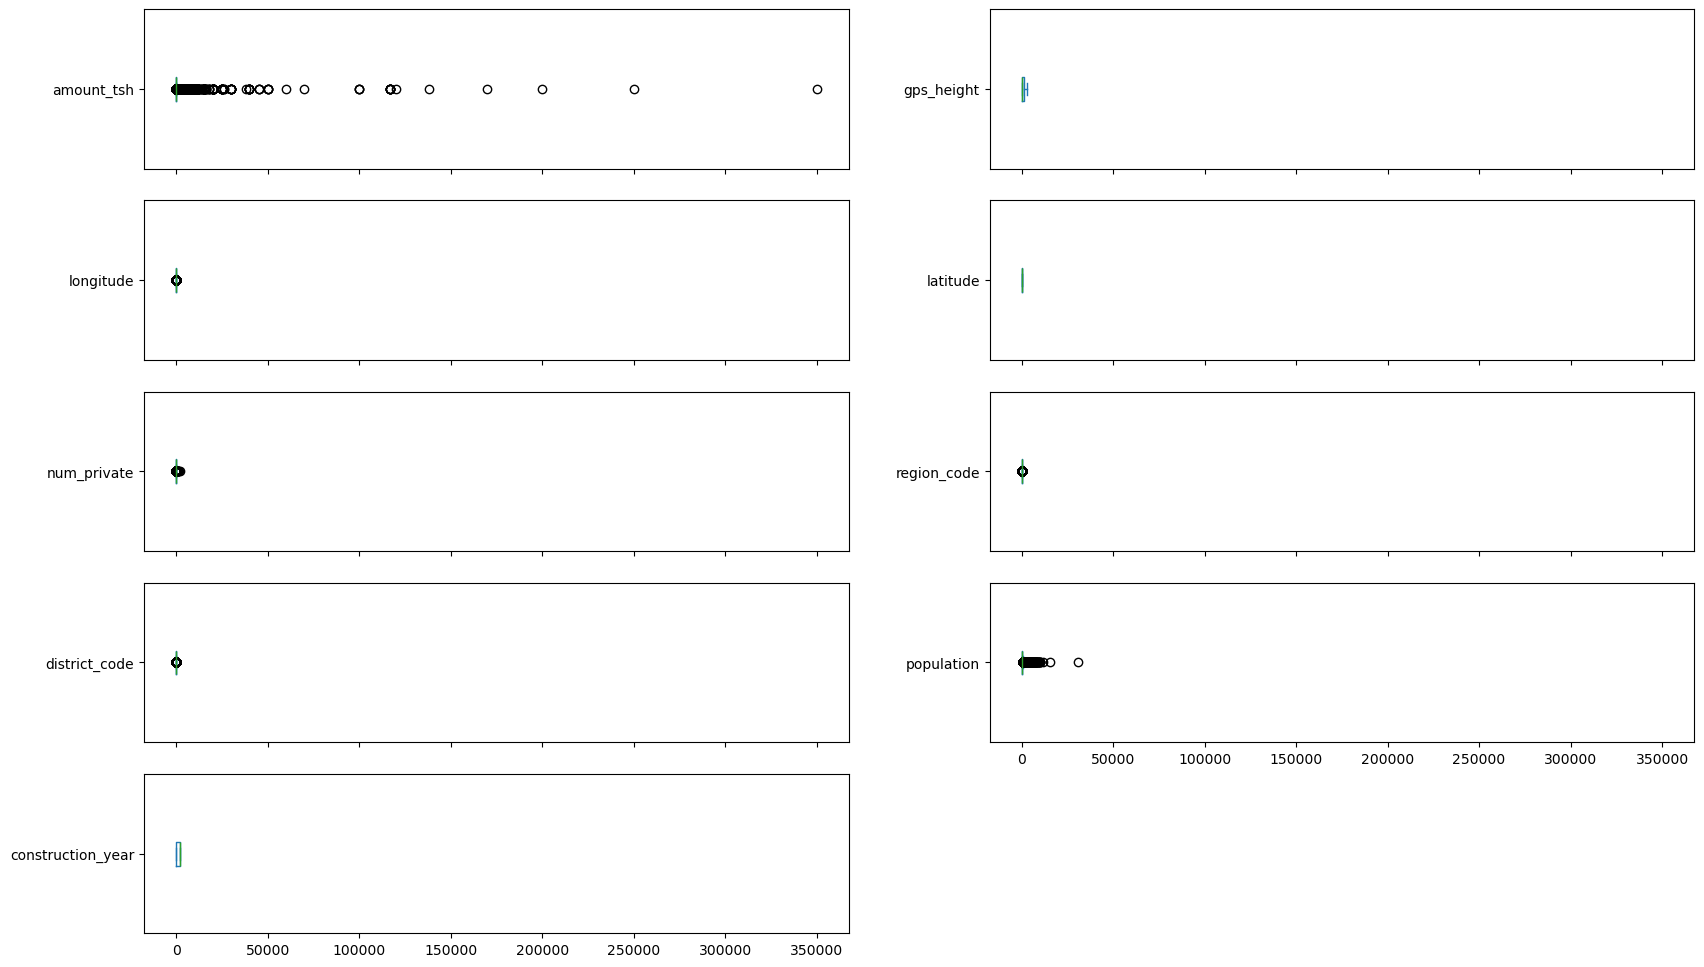

In [138]:
# Box plots for numeric columns
train_df[numeric_cols].plot(kind='box', subplots=True, layout=(5, 2), figsize=(20, 12), vert=False)
plt.show()

There are outliers in the 'amount_tsh' and 'population' columns. 

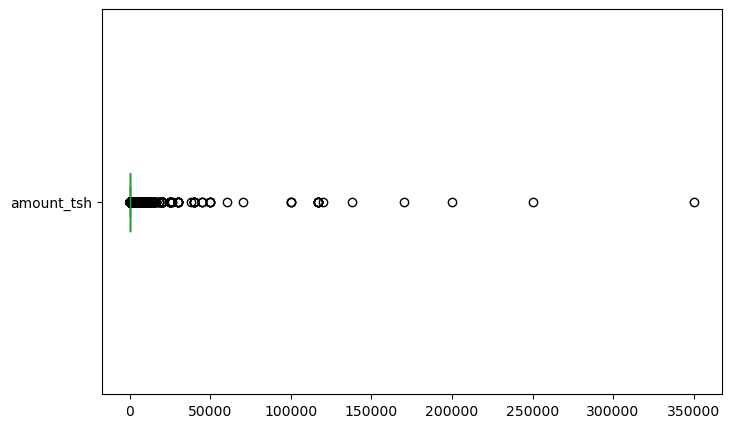

In [141]:
# Box plots for numeric columns
train_df['amount_tsh'].plot(kind='box', figsize=(8, 5), vert=False)
plt.show()

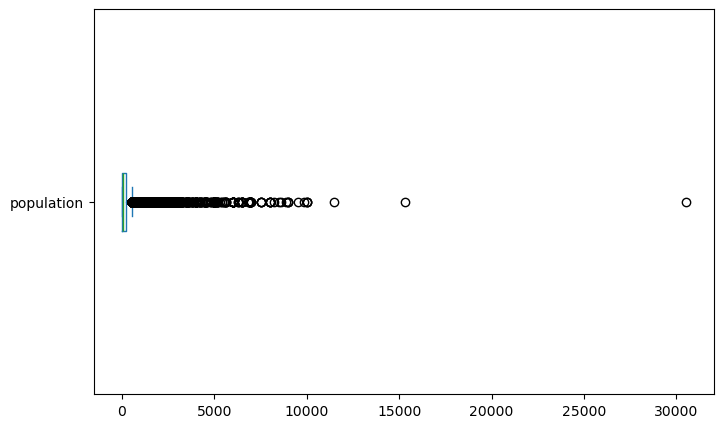

In [142]:
# Box plots for numeric columns
train_df['population'].plot(kind='box', figsize=(8, 5), vert=False)
plt.show()

### EXPLORATORY DATA ANALYSIS

## PRE-PROCESSING

### TRANSFORMATIONS & SCALING

### FEATURE SELECTION

## MODELING

## EVALUATION